# Figures for the paper

In [1]:
from scipy.integrate import quad
from numpy import *
from matplotlib.pylab import *
import matplotlib as mpl
%matplotlib inline

In [2]:
import PIL.Image as Image
import pickle

In [4]:
rc('text',usetex=True)
rc('text.latex',preamble=r'\usepackage{amssymb}')
rcParams['savefig.pad_inches'] = 0


SMALL_SIZE = 13
MEDIUM_SIZE = 16
BIGGER_SIZE = 20

rc('font',size = BIGGER_SIZE)
rc('axes',titlesize = BIGGER_SIZE)
rc('axes',labelsize = BIGGER_SIZE)
rc('xtick',labelsize = BIGGER_SIZE)
rc('ytick',labelsize = BIGGER_SIZE)
rc('legend',handlelength= 1.0,fontsize = MEDIUM_SIZE)
rc('figure',titlesize = BIGGER_SIZE)

In [5]:
alphabet = []
for letter in range(65, 91):
    alphabet.append(chr(letter))
    
print(alphabet)

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


In [6]:
def numbering_panels(axs,pos = None,labels=alphabet):
    if pos is None:
        pos = zeros((len(axs),2))
        pos[:,1] = 1-pos[:,1]
        
    for i,ax in enumerate(axs):
        ax.text(pos[i,0],pos[i,1],labels[i],horizontalalignment='right',verticalalignment='top', transform=ax.transAxes)
    return

In [7]:
def plot_trace(data,t,ax=None,c='C0',band= None,label= None,linestyle='-'):
    if ax is None:
        ax = gca()
    vtracso = data*1.0
    vtracso.sort(axis=1)
    sh = vtracso.shape[1]
    nmed = sh//2
    nl1, nv1 = int(sh*0.16),int(sh*(1-0.16))
    nl2, nv2 = int(sh*0.025),int(sh*(1-0.025))

    if label is None:
        ax.plot(t,vtracso[:,nmed],c=c,linestyle=linestyle)
    else:
        ax.plot(t,vtracso[:,nmed],c=c,linestyle=linestyle,label=label)
        
    if band == 0:
        pass
    elif band == 1:
        ax.fill_between(t,vtracso[:,nl1],vtracso[:,nv1],color=c,alpha=0.5)
    elif band ==2:
        ax.fill_between(t,vtracso[:,nl2],vtracso[:,nv2],color=c,alpha=0.5)
    else:
        ax.fill_between(t,vtracso[:,nl1],vtracso[:,nv2],color=c,alpha=0.2)
        ax.fill_between(t,vtracso[:,nl1],vtracso[:,nv1],color=c,alpha=0.5)
    return(ax)

# Scale bars
def scalebar(ax,x0,y0,dx,dy,xlab = '', ylab = '', color = 'k'):
    xs = x0+linspace(0,dx,4)
    ax.vlines(x0,y0,y0+dy,color = color)
    ax.plot(xs,xs*0+y0,c = color)
    ax.text(x0,y0+dy*.3,ylab,horizontalalignment="right")   
    ax.text(x0+dx/2,y0-dy*0.02,xlab,verticalalignment="top",horizontalalignment="center")     

def running_mean(x, N, padding = "valid"):
    if padding =="same":
        N2 = N//2
        Nf = float(N)
        cumsumt = cumsum(concatenate((zeros(1),x,zeros(N-1))))
        runmean = (cumsumt[N:] - cumsumt[:-N]) / Nf
        runmean[-N+1:] = runmean[-N+1:]*Nf/(arange(Nf-1,0,-1))
    elif padding =="valid":
        cumsumt = cumsum(insert(x, 0, 0))
        runmean = (cumsumt[N:] - cumsumt[:-N]) / float(N)
    return(runmean)
def running_std(x, N, padding = "valid"):
    if padding =="same":
        N2 = N//2
        Nf = float(N)
        cumsumt = cumsum(concatenate((zeros(1),x,zeros(N-1))))
        runmean = (cumsumt[N:] - cumsumt[:-N]) / Nf
        runmean[-N+1:] = runmean[-N+1:]*Nf/(arange(Nf-1,0,-1))
        cumsumt = cumsum(concatenate((zeros(1),x*x,zeros(N-1))))
        runstd = (cumsumt[N:] - cumsumt[:-N]) / Nf
        runstd[-N+1:] = runmean[-N+1:]*Nf/(arange(Nf-1,0,-1))
        runstd = sqrt(runstd-runmean**2)
    elif padding =="valid":
        cumsumt = cumsum(insert(x, 0, 0))
        runmean = (cumsumt[N:] - cumsumt[:-N]) / float(N)
        
        cumsumt = cumsum(insert(x**2, 0, 0))
        runstd = (cumsumt[N:] - cumsumt[:-N]) / float(N)
        runstd = sqrt(runstd-runmean**2)
    return(runstd)

In [77]:
#Jupyters: Proper Spine Model - Inhibition.ipynb
with open("../SpineModel/dis_baselineB_disx2.pickle","rb") as f:
    vavgDiS,mesDiS,vtracsDiS,vtracsDDiS,vtracsSDiS,CtracsDiS,_,_ = pickle.load(f)

with open("../SpineModel/dis_baselineB_spsx2.pickle","rb") as f:
    vavg,mes,vtracs,vtracsD,vtracsS,Ctracs,me2,me3 = pickle.load(f)

with open("../SpineModel/All_baseline_datasetx2.pickle","rb") as f:
    vavgT,mesT,vtracsT,vtracsDT,vtracsST,CtracsT,me2T,_,dataT = pickle.load(f)

# Jupyters: Proper Spine Model - Depolarizing inhibitionx2
with open("../SpineModel/SPS_InhVoltage_datasetC_x2.pickle","rb") as f:
            mVsDiSI,mVsshI = pickle.load(f) 

with open("../SpineModel/SPS_Voltagedistx1e5_tempx2.pickle","rb") as f:
            mVs = pickle.load(f) 
        
with open("../SpineModel/SPS_Voltagedistx1e5_tempx2.pickle","rb") as f:
            mVb = pickle.load(f) 
with open("../SpineModel/SPS_InhVoltagedistx1e5x2.pickle","rb") as f:
            mVbI = pickle.load(f) 
        
        


n = 800
sel = mVb[:,-2] == 1
s1 = arange(mVs.shape[0])[sel]
s2 = arange(mVs.shape[0])[~sel]
xt,yt = mVb[s1,-1],mVb[s1,2]
sel = xt.argsort(); xt = xt[sel]; yt = yt[sel]
xtSiS = running_mean(xt,n)
#yt2 = running_std(yt,n)
ytSiS = running_mean(yt,n)

xt,yt = mVb[s2,-1],mVb[s2,2]
sel = xt.argsort(); xt = xt[sel]; yt = yt[sel]
nDiS = 200
xtDiS = running_mean(xt,nDiS)
#yt2 = running_std(yt,n)
ytDiS = running_mean(yt,nDiS)

xt,yt = mVbI[:,-1],mVbI[:,2]
sel = xt.argsort(); xt = xt[sel]; yt = yt[sel]
xtspI = running_mean(xt,n)
ytspI = running_mean(yt,n)

xt,yt = mVbI[:,-1],mVbI[:,5]
sel = xt.argsort(); xt = xt[sel]; yt = yt[sel]
xtshI = running_mean(xt,n)
#yt2 = running_std(yt,n)
ytshI = running_mean(yt,n)


Text(0, 0.5, 'Vspine')

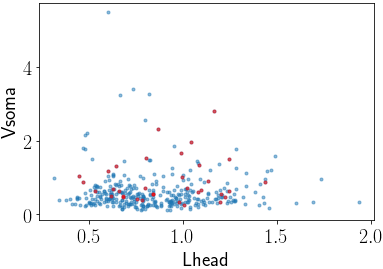

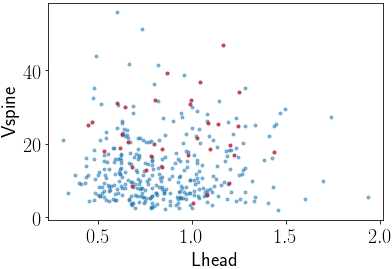

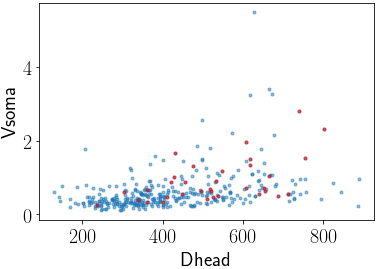

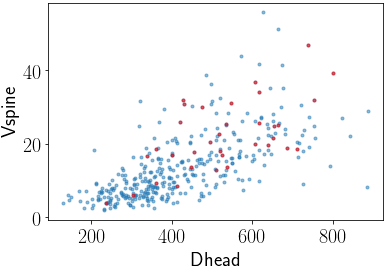

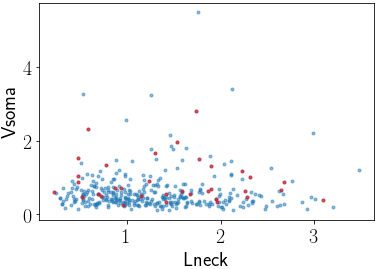

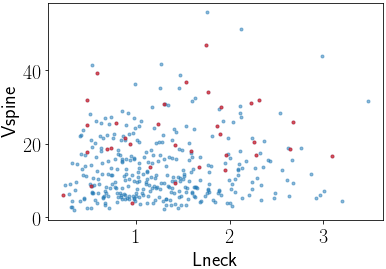

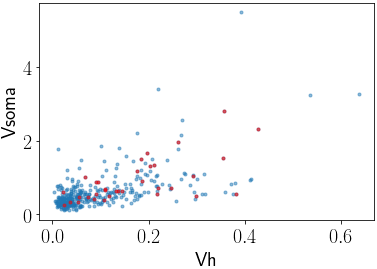

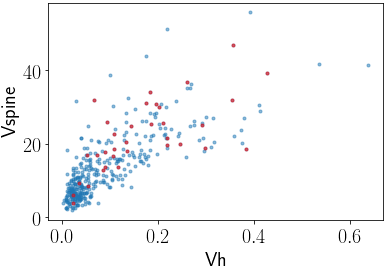

In [79]:
s0 = dataT['A2']>0

plot(abs(dataT['Lhead']),mesT[:,4],'.',label="Spine head",alpha=0.5)
plot(abs(dataT['Lhead'][s0]),mesT[s0,4],'r.',label="Spine head",alpha=0.5)
xlabel('Lhead')
ylabel('Vsoma')
figure()
# Plot in fig Delta V max
EL0 = -70
plot(abs(dataT['Lhead']),mesT[:,1],'C0.',label="Spine head - SiS",alpha=0.5)
plot(abs(dataT['Lhead'][s0]),mesT[s0,1],'r.',label="Spine head - DiS",alpha=0.5)
xlabel('Lhead')
ylabel('Vspine')

figure()
plot(abs(dataT['maxDhead']),mesT[:,4],'.',label="Spine head",alpha=0.5)
plot(abs(dataT['maxDhead'][s0]),mesT[s0,4],'r.',label="Spine head",alpha=0.5)
xlabel('Dhead')
ylabel('Vsoma')
figure()
# Plot in fig Delta V max
EL0 = -70
plot(abs(dataT['maxDhead']),mesT[:,1],'C0.',label="Spine head - SiS",alpha=0.5)
plot(abs(dataT['maxDhead'][s0]),mesT[s0,1],'r.',label="Spine head - DiS",alpha=0.5)
xlabel('Dhead')
ylabel('Vspine')

figure()
key = 'Lneck'
plot(abs(dataT[key]),mesT[:,4],'.',label="Spine head",alpha=0.5)
plot(abs(dataT[key][s0]),mesT[s0,4],'r.',label="Spine head",alpha=0.5)
xlabel(key)
ylabel('Vsoma')
figure()
# Plot in fig Delta V max
EL0 = -70
plot(abs(dataT[key]),mesT[:,1],'C0.',label="Spine head - SiS",alpha=0.5)
plot(abs(dataT[key][s0]),mesT[s0,1],'r.',label="Spine head - DiS",alpha=0.5)
xlabel(key)
ylabel('Vspine')
figure()
key = 'Vh'
plot(abs(dataT[key]),mesT[:,4],'.',label="Spine head",alpha=0.5)
plot(abs(dataT[key][s0]),mesT[s0,4],'r.',label="Spine head",alpha=0.5)
xlabel(key)
ylabel('Vsoma')
figure()
# Plot in fig Delta V max
EL0 = -70
plot(abs(dataT[key]),mesT[:,1],'C0.',label="Spine head - SiS",alpha=0.5)
plot(abs(dataT[key][s0]),mesT[s0,1],'r.',label="Spine head - DiS",alpha=0.5)
xlabel(key)
ylabel('Vspine')

In [83]:
.

0.7945680478263176

In [28]:
#Jupyters: Proper Spine Model - Inhibition x2 - Supp Mat
with open("/mnt/data/inhibition_disx2_supMat_F.pickle","rb") as f:
    fulld = pickle.load(f)

with open("/mnt/data/inhibition_disx2_supMat.pickle","rb") as f:
    tdels,data2,data,dtime = pickle.load(f)

with open("/mnt/data/inhibition_sisx2_supMat_F.pickle","rb") as f:
    fulldsis = pickle.load(f)

In [34]:
tdels,data2,data,dtime = fulld[250]
tdelssis,data2sis,datasis,dtimesis = fulldsis[250]


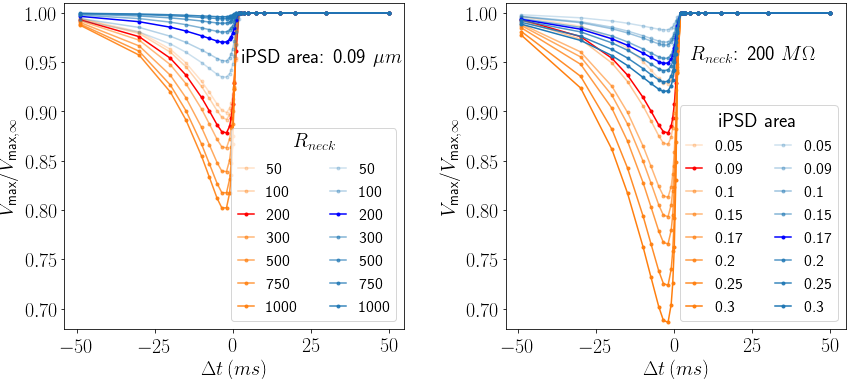

In [59]:
A2s = [0.05,0.09,0.1,0.15,0.17,0.2,0.25,0.3]
Rns = [50,100,200,300,500,750,1000]
fig = figure(figsize=(14,6))
gs = mpl.gridspec.GridSpec(1, 2,  wspace=0.3, hspace=.25) # 2x3 grid

Re = 200
ymin = 1
ax0 = fig.add_subplot(gs[:, 0]) # first full col
ax1 = fig.add_subplot(gs[:, 1]) # first row, second col
for i,R in enumerate(Rns):
    ymin = min(ymin,data2[(0.09,R)][:,0].min())
    if R==Re:
        ax0.plot(tdels,data2[(0.09,R)][:,0],'r.-',label=R)
    else:
        ax0.plot(tdels,data2[(0.09,R)][:,0],'C1.-',label=R,alpha=(i+2)/(len(Rns)+2))
#ax0.legend(title='$R_{neck}$')
for i,R in enumerate(Rns):
    ymin = min(ymin,data2sis[(0.09,R)][:,0].min())
    if R==Re:
        ax0.plot(tdels,data2sis[(0.09,R)][:,0],'b.-',label=R)
    else:
        ax0.plot(tdels,data2sis[(0.09,R)][:,0],'C0.-',label=R,alpha=(i+2)/(len(Rns)+2))
ax0.legend(title='$R_{neck}$',ncol=2)


for i,A2 in enumerate(A2s):
    ymin = min(ymin,data2[(A2,Re)][:,0].min())
    if A2==0.09:
        ax1.plot(tdels,data2[(A2,Re)][:,0],'r.-',label=A2)
    else:
        ax1.plot(tdels,data2[(A2,Re)][:,0],'C1.-',label=A2,alpha=(i+2)/(len(Rns)+2))

    
for i,A2 in enumerate(A2s):
    ymin = min(ymin,data2sis[(A2,Re)][:,0].min())
    if A2==0.17:
        ax1.plot(tdels,data2sis[(A2,Re)][:,0],'b.-',label=A2)
    else:
        ax1.plot(tdels,data2sis[(A2,Re)][:,0],'C0.-',label=A2,alpha=(i+2)/(len(Rns)+2))
        
ax1.legend(title='iPSD area',ncol=2)
ax1.set_xlabel('$\Delta t\, (ms)$')
ax0.set_xlabel('$\Delta t\, (ms)$')
ax0.set_ylabel('$V_{\sf max}/V_{\sf max,\infty}$')
ax1.set_ylabel('$V_{\sf max}/V_{\sf max,\infty}$')
ymin = ymin*.99
ax0.set_ylim(ymin,1.01)
ax1.set_ylim(ymin,1.01)
ax0.annotate('iPSD area: 0.09 $\mu m$' , xy = (3,0.95)  )
ax1.annotate('$R_{neck}$: %.0f $M \Omega$' % Re , xy = (5,0.95)  )
savefig("SM_Vvst.png",dpi = 300, tight_layout = True)
#ax0.plot(tdels,data2[(0.09,500)][:,0],'k.-')
#ax1.plot(tdels,data2[(0.09,500)][:,0],'k.-')

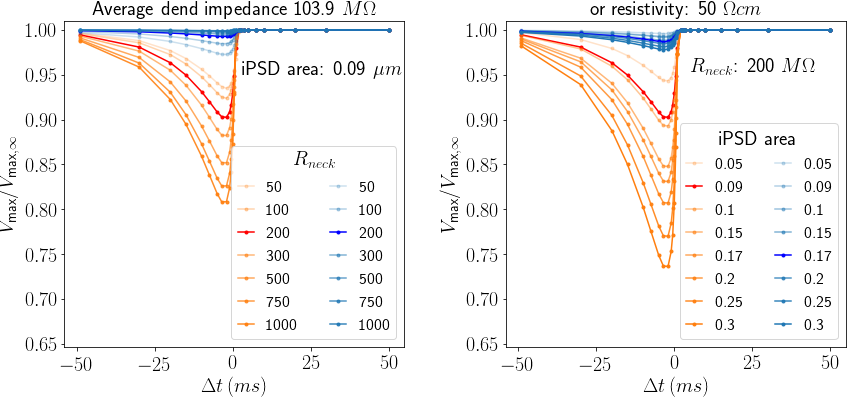

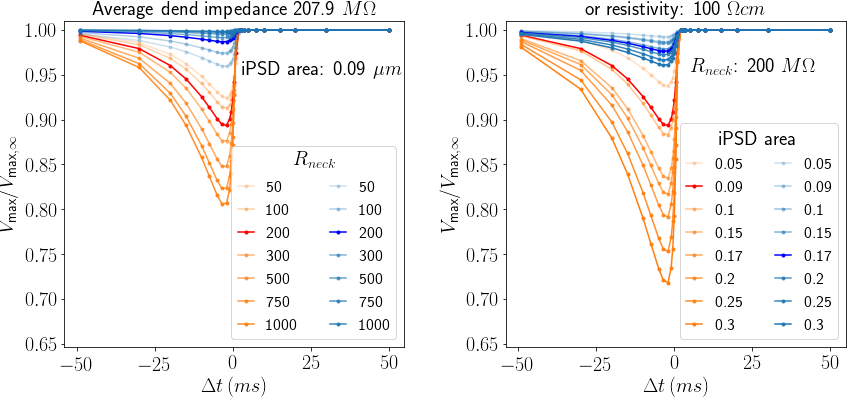

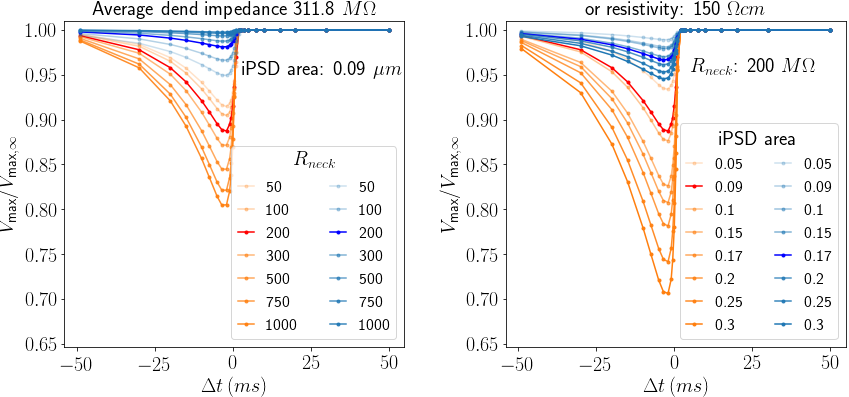

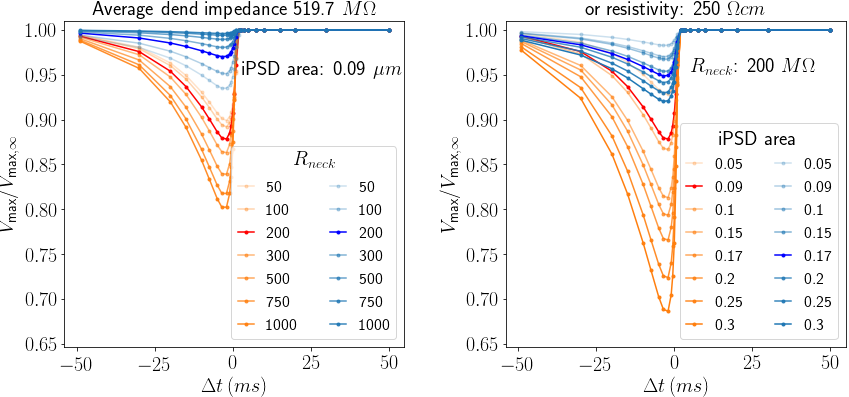

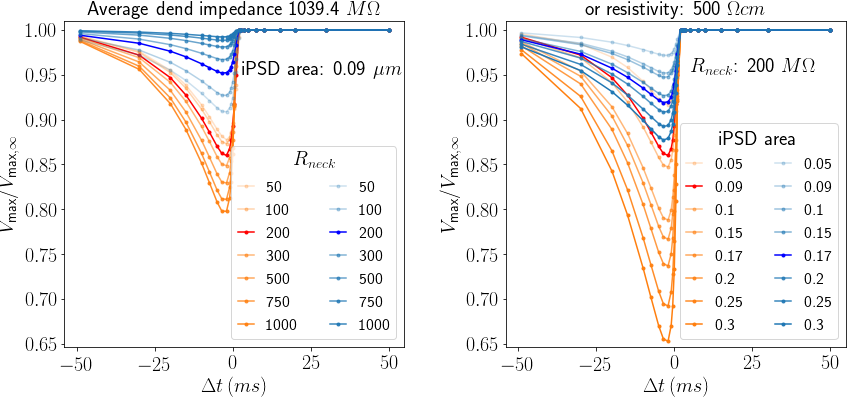

In [76]:
ymin = 1
axs = {}
figs = {}
for key in fulld.keys():
    tdels,data2,data,dtime = fulld[key]
    tdelssis,data2sis,datasis,dtimesis = fulldsis[key]


    A2s = [0.05,0.09,0.1,0.15,0.17,0.2,0.25,0.3]
    Rns = [50,100,200,300,500,750,1000]
    fig = figure(figsize=(14,6))
    figs[key] = fig
    gs = mpl.gridspec.GridSpec(1, 2,  wspace=0.3, hspace=.25) # 2x3 grid

    Re = 200
    ax0 = fig.add_subplot(gs[:, 0]) # first full col
    ax1 = fig.add_subplot(gs[:, 1]) # first row, second col
    axs[key] = [ax0,ax1]
    for i,R in enumerate(Rns):
        ymin = min(ymin,data2[(0.09,R)][:,0].min())
        if R==Re:
            ax0.plot(tdels,data2[(0.09,R)][:,0],'r.-',label=R)
        else:
            ax0.plot(tdels,data2[(0.09,R)][:,0],'C1.-',label=R,alpha=(i+2)/(len(Rns)+2))
    #ax0.legend(title='$R_{neck}$')
    for i,R in enumerate(Rns):
        ymin = min(ymin,data2sis[(0.09,R)][:,0].min())
        if R==Re:
            ax0.plot(tdels,data2sis[(0.09,R)][:,0],'b.-',label=R)
        else:
            ax0.plot(tdels,data2sis[(0.09,R)][:,0],'C0.-',label=R,alpha=(i+2)/(len(Rns)+2))
    ax0.legend(title='$R_{neck}$',ncol=2)


    for i,A2 in enumerate(A2s):
        ymin = min(ymin,data2[(A2,Re)][:,0].min())
        if A2==0.09:
            ax1.plot(tdels,data2[(A2,Re)][:,0],'r.-',label=A2)
        else:
            ax1.plot(tdels,data2[(A2,Re)][:,0],'C1.-',label=A2,alpha=(i+2)/(len(Rns)+2))


    for i,A2 in enumerate(A2s):
        ymin = min(ymin,data2sis[(A2,Re)][:,0].min())
        if A2==0.17:
            ax1.plot(tdels,data2sis[(A2,Re)][:,0],'b.-',label=A2)
        else:
            ax1.plot(tdels,data2sis[(A2,Re)][:,0],'C0.-',label=A2,alpha=(i+2)/(len(Rns)+2))

    ax1.legend(title='iPSD area',ncol=2)
    ax1.set_xlabel('$\Delta t\, (ms)$')
    ax0.set_xlabel('$\Delta t\, (ms)$')
    ax0.set_ylabel('$V_{\sf max}/V_{\sf max,\infty}$')
    ax1.set_ylabel('$V_{\sf max}/V_{\sf max,\infty}$')
    ymin = ymin*.99
    ax0.set_ylim(ymin,1.01)
    ax1.set_ylim(ymin,1.01)
    ax0.annotate('iPSD area: 0.09 $\mu m$' , xy = (3,0.95)  )
    ax1.annotate('$R_{neck}$: %.0f $M \Omega$' % Re , xy = (5,0.95)  )
    #ax0.plot(tdels,data2[(0.09,500)][:,0],'k.-')
    #ax1.plot(tdels,data2[(0.09,500)][:,0],'k.-')
    

for key in axs.keys():
    ax0,ax1 = axs[key]
    ax0.set_ylim(ymin,1.01)
    ax1.set_ylim(ymin,1.01)
    avimpedance = 80e-6*float(key)/100/((0.7e-6/2)**2*pi)/1e6
    ax0.set_title('Average dend impedance %.1f $M\Omega$' % avimpedance)
    ax1.set_title('or resistivity: '+str(key)+' $\Omega cm$')
    figs[key].savefig("SM_Vvst"+str(key).zfill(4)+".png",dpi = 300, tight_layout = True)


In [70]:
80e-6*1.5/((0.7e-6/2)**2*pi)/1e6

311.81376605759095

In [39]:
ax0.legend?

In [26]:
tdels,data2,data,dtime = fulld[50]

Text(0, 0.5, '$V_{\\sf max}/V_{\\sf max,\\infty}$')

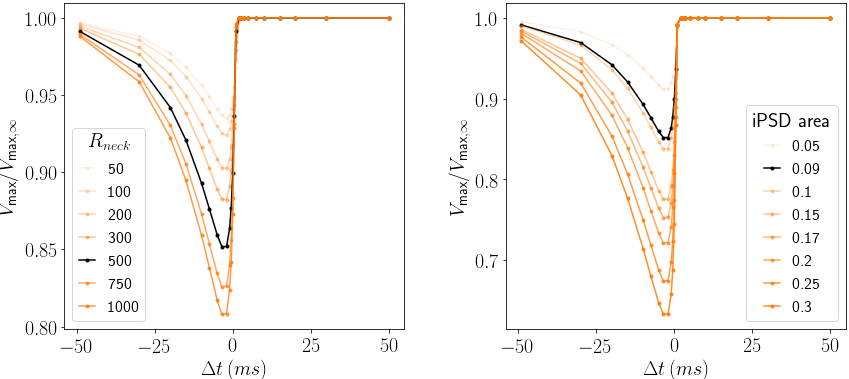

In [27]:
A2s = [0.05,0.09,0.1,0.15,0.17,0.2,0.25,0.3]
Rns = [50,100,200,300,500,750,1000]
fig = figure(figsize=(14,6))
gs = mpl.gridspec.GridSpec(1, 2,  wspace=0.3, hspace=.25) # 2x3 grid

ax0 = fig.add_subplot(gs[:, 0]) # first full col
ax1 = fig.add_subplot(gs[:, 1]) # first row, second col
for i,R in enumerate(Rns):
    if R==500:
        ax0.plot(tdels,data2[(0.09,R)][:,0],'k.-',label=R)
    else:
        ax0.plot(tdels,data2[(0.09,R)][:,0],'C1.-',label=R,alpha=(i+1)/(len(Rns)+2))
ax0.legend(title='$R_{neck}$')

for i,A2 in enumerate(A2s):
    if A2==0.09:
        ax1.plot(tdels,data2[(A2,500)][:,0],'k.-',label=A2)
    else:
        ax1.plot(tdels,data2[(A2,500)][:,0],'C1.-',label=A2,alpha=(i+1)/(len(Rns)+2))
ax1.legend(title='iPSD area')
ax1.set_xlabel('$\Delta t\, (ms)$')
ax0.set_xlabel('$\Delta t\, (ms)$')
ax0.set_ylabel('$V_{\sf max}/V_{\sf max,\infty}$')
ax1.set_ylabel('$V_{\sf max}/V_{\sf max,\infty}$')

In [166]:
#Jupyters: Proper Spine Model - Inhibition.ipynb
with open("../SpineModel/dis_baselineB_disx2.pickle","rb") as f:
    vavgDiS,mesDiS,vtracsDiS,vtracsDDiS,vtracsSDiS,CtracsDiS,_,_ = pickle.load(f)

with open("../SpineModel/dis_baselineB_spsx2.pickle","rb") as f:
    vavg,mes,vtracs,vtracsD,vtracsS,Ctracs,me2,me3 = pickle.load(f)

with open("../SpineModel/All_baseline_datasetx2.pickle","rb") as f:
    vavgT,mesT,vtracsT,vtracsDT,vtracsST,CtracsT,me2T,_,dataT = pickle.load(f)

# Jupyters: Proper Spine Model - Depolarizing inhibitionx2
with open("../SpineModel/SPS_InhVoltage_datasetC_x2.pickle","rb") as f:
            mVsDiSI,mVsshI = pickle.load(f) 

with open("../SpineModel/SPS_Voltagedistx1e5_tempx2.pickle","rb") as f:
            mVs = pickle.load(f) 
        
with open("../SpineModel/SPS_Voltagedistx1e5_tempx2.pickle","rb") as f:
            mVb = pickle.load(f) 
with open("../SpineModel/SPS_InhVoltagedistx1e5x2.pickle","rb") as f:
            mVbI = pickle.load(f) 
        
        


n = 800
sel = mVb[:,-2] == 1
s1 = arange(mVs.shape[0])[sel]
s2 = arange(mVs.shape[0])[~sel]
xt,yt = mVb[s1,-1],mVb[s1,2]
sel = xt.argsort(); xt = xt[sel]; yt = yt[sel]
xtSiS = running_mean(xt,n)
#yt2 = running_std(yt,n)
ytSiS = running_mean(yt,n)

xt,yt = mVb[s2,-1],mVb[s2,2]
sel = xt.argsort(); xt = xt[sel]; yt = yt[sel]
nDiS = 200
xtDiS = running_mean(xt,nDiS)
#yt2 = running_std(yt,n)
ytDiS = running_mean(yt,nDiS)

xt,yt = mVbI[:,-1],mVbI[:,2]
sel = xt.argsort(); xt = xt[sel]; yt = yt[sel]
xtspI = running_mean(xt,n)
ytspI = running_mean(yt,n)

xt,yt = mVbI[:,-1],mVbI[:,5]
sel = xt.argsort(); xt = xt[sel]; yt = yt[sel]
xtshI = running_mean(xt,n)
#yt2 = running_std(yt,n)
ytshI = running_mean(yt,n)


In [167]:
modeldt = 0.05
bands = 1

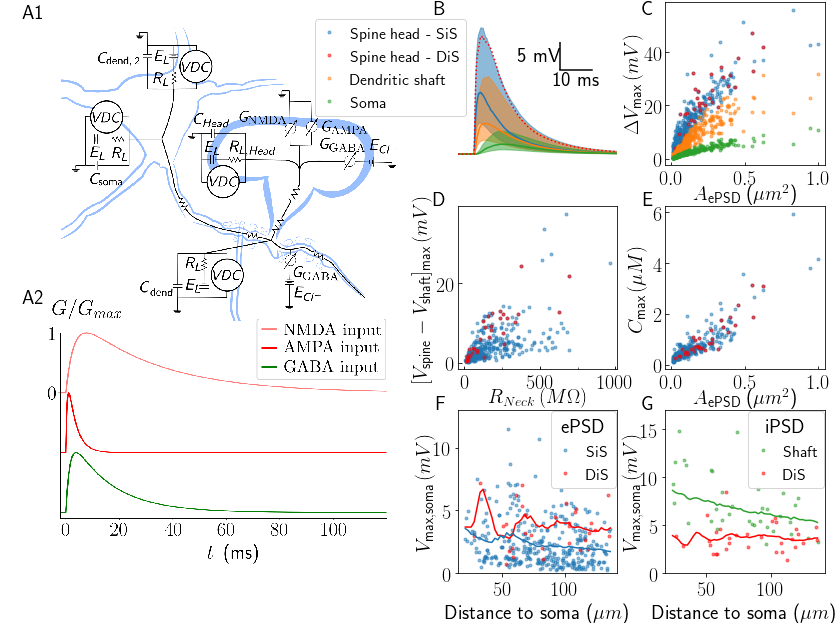

In [168]:
im = Image.open('../Neuron_persp4.png')
height = im.size[1]
im = np.array(im).astype(np.float) / 255
fig = figure(figsize=(14,10.5))
gs = mpl.gridspec.GridSpec(3, 4,  wspace=0.3, hspace=.25) # 2x3 grid

ax0 = fig.add_subplot(gs[:, 0:2]) # first full col
ax1 = fig.add_subplot(gs[0, 2]) # first row, second col
ax3 = fig.add_subplot(gs[0, 3]) # first row, third col
ax2 = fig.add_subplot(gs[1, 2]) # 2nd row, second col
ax4 = fig.add_subplot(gs[1, 3]) # 2nd row, 3rd col
axl1 = fig.add_subplot(gs[2, 2]) # 3nd row, second col
axl2 = fig.add_subplot(gs[2, 3]) # 3nd row, 3rd col

ax0.imshow(im)
ax0.set_axis_off()


# Plots in fig EPSP
s1 = dataT['nPSD']==1.0
s2 = dataT['nPSD']==2.0

plot_trace(vtracsT[:,s1],arange(vtracsT.shape[0])*modeldt-100+5,ax1,c='C0',band = bands)
plot_trace(vtracsDT[:,s1],arange(vtracsDT.shape[0])*modeldt-100+5,ax1,c='C1',band = bands)
plot_trace(vtracsST[:,s1],arange(vtracsST.shape[0])*modeldt-100+5,ax1,c='C2',band = bands)
plot_trace(vtracsT[:,s2],arange(vtracsT.shape[0])*modeldt-100+5,ax1,c='r',band = 0,linestyle=':')





# Plot in fig Delta V - V_dend
s0 = dataT['A2']>0
ax2.plot(abs(mesT[:,0]),mesT[:,1]-mesT[:,2],'.',label="Spine head",alpha=0.5)
ax2.plot(abs(mesT[s0,0]),mesT[s0,1]-mesT[s0,2],'r.',label="Spine head",alpha=0.5)

# Plot in fig Calcium
ax4.plot(abs(dataT['A1']),mesT[:,4],'.',label="Spine head",alpha=0.5)
ax4.plot(abs(dataT['A1'][s0]),mesT[s0,4],'r.',label="Spine head",alpha=0.5)

# Plot in fig Delta V max
EL0 = -70
ax3.plot(abs(dataT['A1']),mesT[:,1],'C0.',label="Spine head - SiS",alpha=0.5)
ax3.plot(abs(dataT['A1'][s0]),mesT[s0,1],'r.',label="Spine head - DiS",alpha=0.5)
ax3.plot(abs(dataT['A1']),me2T[:,4]-EL0,'C1.',label="Dendritic shaft",alpha=0.5)
ax3.plot(abs(dataT['A1']),mesT[:,3],'C2.',label="Soma",alpha=0.5)
#ax3.plot(abs(mesT[s0,-3]/1e-3),mesT[s0,3],'r.',label="Spine head",alpha=0.5)


mVav = mVsshI[:,2].mean()
axl2.plot(mVsshI[:,-1],mVsshI[:,2],'C2.',alpha=0.5,label='Shaft')#,label='Axo-dendritic')

axl2.plot(mVsDiSI[:,-1],mVsDiSI[:,2],'r.',alpha=0.5,label='DiS')#,label='Axo-spinous')


axl2.set_ylabel('$V_{\sf max, soma}\, (mV)$')
axl2.set_xlabel('Distance to soma ($\mu m$)')


xt = linspace(min(mVsshI[:,-1]),max(mVsshI[:,-1]))
axl2.plot(xt,interp(xt,xtshI,ytshI),'C2')
axl2.plot(xt,interp(xt,xtspI,ytspI),'r')

#axl2.plot(xt,yt,'r',label='DiS')
#axl2.legend(title='Excitation',loc=(0.5,0.65))
#axl2.set_ylabel('$V_{\max}$ in soma',rotation = 0)

#axl2.fill_between(xt,yt+yt2,yt-yt2,color = 'r',alpha=0.7,band = 0)


s1v = dataT['nPSD']==1.0
s2v = dataT['nPSD']==2.0
axl1.plot(dataT['Dss'][s1v],mesT[s1v,3],'C0.',alpha=0.5,label='SiS')
axl1.plot(dataT['Dss'][s2v],mesT[s2v,3],'r.',alpha=0.5,label='DiS')

axl1.set_ylabel('$V_{\sf max, soma}\, (mV)$')
axl1.set_xlabel('Distance to soma ($\mu m$)')

xt = linspace(min(dataT['Dss']),max(dataT['Dss']))
axl1.plot(xt,interp(xt,xtDiS,ytDiS),'r')
axl1.plot(xt,interp(xt,xtSiS,ytSiS),'C0')
#axl2.set_ylabel('$V_{\max}$ in soma',rotation = 0)

#axl2.fill_between(xt,yt+yt2,yt-yt2,color = 'r',alpha=0.7,band = 0)


# Accesories

scalebar(ax1,52,-55,10,5,xlab = '10 ms', ylab = '5 mV ', color = 'k')
ax1.set_axis_off()
ax2.set_xlabel("$R_{Neck}\, (M\Omega)$")
ax2.set_ylabel("$[V_{\sf spine}-V_{\sf shaft}]_{\sf max}\, (mV)$")
ax4.set_xlabel("$A_{\sf ePSD}$ ($\mu m^2$)")
ax4.set_ylabel("$C_{\sf max}\, (\mu M)$")
#ax3.set_xlabel("- $I_{s,max}$(pA)")
ax3.set_xlabel("$A_{\sf ePSD}$ ($\mu m^2$)")

ax3.set_ylabel("$\Delta V_{\sf max}\, (mV)$")
ax3.tick_params(direction="in")
ax4.tick_params(which='both',direction="in")
ax2.tick_params(direction="in")
ax3.set_xticks(ticks=arange(0,1.5,0.5))
ax4.set_xticks(ticks=arange(0,1.5,0.5))
ax2.set_xticks(ticks=arange(0,600,200))

ax2.xaxis.set_minor_locator(FixedLocator(arange(0,4000,250)))
ax2.xaxis.set_major_locator(FixedLocator(arange(0,4000,500)))
ax2.xaxis.set_tick_params(which='minor',direction='in')
#ax4.xaxis.set_label_coords(0.5,-0.12)
ax2.yaxis.set_label_coords(-.15,0.5)
ax3.yaxis.set_label_coords(-.13,0.5)
ax3.xaxis.set_label_coords(0.5,-0.12)
ax2.xaxis.set_label_coords(0.5,-0.12)
ax4.xaxis.set_label_coords(0.5,-0.12)
axl2.yaxis.set_label_coords(-.13,0.5)
axl1.yaxis.set_label_coords(-.13,0.5)

#ax4.yaxis.set_label_coords(-.15,0.5)

ax3.legend(loc = (-2.2,0.3))
axl1.legend(title='ePSD',loc=(0.58,0.52))
axl2.legend(title='iPSD',loc=(0.52,0.52))

ax1.set_xlim(20,70)
ax1.set_ylim(-72,-43)
axl1.set_ylim(0,13)
axl2.set_ylim(0,17)

#ax4.set_ylim(0,4.5)
axs = [ax0,ax1,ax3,ax2,ax4,axl1,axl2,ax0]
pos = zeros((len(axs),2))
pos[:,1] = 1-pos[:,1]
pos[:3,1] = 1.02
pos[0,1] = 1.01

pos[3:,1] = 1.1
pos[1:,0] = -0.07
pos[-1,:] = (0.,0.5)
numbering_panels(axs,pos,labels=['A1','B','C','D','E','F','G','A2'])
savefig("Figure_Model_1bx2.png",dpi = 300, tight_layout = True)

#avefig("Figure_Model_1bx2.pdf",dpi = 300, tight_layout = True)



63.4022634921148 4.74930115446857


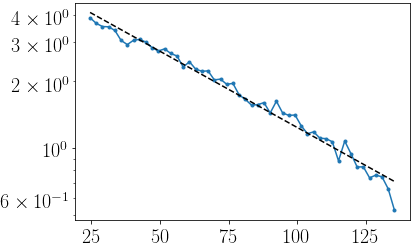

In [169]:
from scipy.stats import linregress

xt = linspace(min(mVsshI[:,-1]),max(mVsshI[:,-1]))
yt = interp(xt,xtshI,ytshI)
miny = min(yt)*.9
plot(xt,yt-miny,'.-')
yt = log(yt-miny)
slope, intercept, r_value, p_value, std_err = linregress(xt,yt)
plot(xt,exp(xt*slope+intercept),'k--')
print(-1./slope,miny)
yscale('log')

61.30218601999044 1.5619718404203844


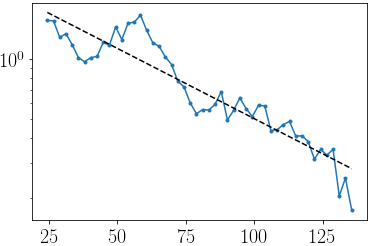

In [174]:
#xt = linspace(min(xtSis),max(xtSis))
yt = interp(xt,xtSiS,ytSiS)
miny = min(yt)*.9
plot(xt,yt-miny,'.-')
yt = log(yt-miny)
slope, intercept, r_value, p_value, std_err = linregress(xt,yt)
plot(xt,exp(xt*slope+intercept),'k--')
print(-1./slope,miny)
yscale('log')

In [41]:
def gradient_image(ax, extent, direction=0.3, cmap_range=(0, 1), **kwargs):
    """
    Draw a gradient image based on a colormap.

    Parameters
    ----------
    ax : Axes
        The axes to draw on.
    extent
        The extent of the image as (xmin, xmax, ymin, ymax).
        By default, this is in Axes coordinates but may be
        changed using the *transform* kwarg.
    direction : float
        The direction of the gradient. This is a number in
        range 0 (=vertical) to 1 (=horizontal).
    cmap_range : float, float
        The fraction (cmin, cmax) of the colormap that should be
        used for the gradient, where the complete colormap is (0, 1).
    **kwargs
        Other parameters are passed on to `.Axes.imshow()`.
        In particular useful is *cmap*.
    """
    phi = direction * np.pi / 2
    v = np.array([np.cos(phi), np.sin(phi)])
    X = np.array([[v @ [1, 0], v @ [1, 1]],
                  [v @ [0, 0], v @ [0, 1]]])
    a, b = cmap_range
    X = a + (b - a) / X.max() * X
    im = ax.imshow(X, extent=extent, interpolation='bicubic',
                   vmin=0, vmax=1, **kwargs)
    return im


def gradient_bar(ax, x, y, width=0.5, bottom=0, cmap = cm.Blues_r):
    for left, top in zip(x, y):
        right = left + width
        gradient_image(ax, extent=(left, right, bottom, top),
                       cmap=cmap, cmap_range=(0,1.0),direction=1)

#plot(randn(5))
#ax = gca()
#ax.set(autoscale_on=False)
#gradient_bar(ax,[0],[0],3.,1.0)
#ax.set_aspect('auto')  

In [61]:
#Jupyter notebook: Proper Spine Model - Inhibition.ipynb
data = {}

with open("../SpineModel/dis_baselinex2.pickle","rb") as f:
    vavg,mes,vtracs,vtracsD,vtracsS,Ctracs = pickle.load(f)
data["dis_baseline"] = [vtracs,Ctracs]
with open("../SpineModel/dis_ga_glu05x2.pickle","rb") as f:
    vavg,mes,vtracs,vtracsD,vtracsS,Ctracs = pickle.load(f)
data["dis_gaglu"] = [vtracs,Ctracs]
with open("../SpineModel/dis_glu_ga05x2.pickle","rb") as f:
    vavg,mes,vtracs,vtracsD,vtracsS,Ctracs = pickle.load(f)
data["dis_gluga"] = [vtracs,Ctracs]
#with open("sis_ga_glu.pickle","rb") as f:
#    vavg,mes,vtracs,vtracsD,vtracsS,Ctracs = pickle.load(f)
data["sis_gaglu"] = [vtracs,Ctracs]
#with open("sis_glu_ga.pickle","rb") as f:
#    vavg,mes,vtracs,vtracsD,vtracsS,Ctracs = pickle.load(f)
data["sis_gluga"] = [vtracs,Ctracs]

with open("inhibition_disx2.pickle","rb") as f:
    tdels,inhtimDis,_,tauDis = pickle.load(f)

# Jupyter notebook: Proper Spine Model - Inhibition outside
with open("inhibition_sis_01x2.pickle","rb") as f:
    tdels,inhtimSis,_,tauSis = pickle.load(f)


In [71]:
# From notebook: Proper Spine Model - Inhibition 
with open("../SpineModel/dis_baselineB_spsx2.pickle","rb") as f:
    _,mesSPS,_,_,_,_,_,_ = pickle.load(f)

with open("../SpineModel/dis_baselineB_disx2.pickle","rb") as f:
    _,mesDiS,_,_,_,_,_,_ = pickle.load(f)


In [72]:
# From notebook:
with open("electrotonicL.pickle","rb") as f:
    vavg,mes,vtracs,vtracsD,vtracsS,Ctracs,me2,me3 = pickle.load(f)
    


mm = me3*1.0
mm = column_stack((me2[:,0],mm))
mm = mm+65
mm[:,1:] = (mm[:,1:].transpose() /mm[:,0]).transpose()
mt = mm[:,1:].mean(axis=0)
mts = mm[:,1:].std(axis=0)
xt = arange(0,10)*7.5
mmn = 1.0*mm
mtn,mtsn = mt,mts

mm = me2*1.0
mm = mm+65
mm[:,1:] = (mm[:,1:].transpose() /mm[:,0]).transpose()
mt = mm[:,1:].mean(axis=0)
mts = mm[:,1:].std(axis=0)
xt = -arange(0,10)*7.5
ms = mean((mes[:,3]+65)/mm[:,0])
mss = std((mes[:,3]+65)/mm[:,0])

In [73]:
#From notebook: Proper Spine Model - Gating info 2
#with open("gatinginfo_0_temp.pickle","rb") as f:
#    fapS,fapD,fap0,fapC = pickle.load(f)
#with open("gatinginfo_u.pickle","rb") as f:
#    fapSu,fapDu,fap0u,fapCu = pickle.load(f)
with open("gatinginfo_f_bRx2.pickle","rb") as f:
    fapSf,fapDf,fap0f,fapCf,fdatf = pickle.load(f)
#with open("gatinginfo_h.pickle","rb") as f:
#    fapSh,fapDh,fap0h,fapCh,fdath = pickle.load(f)

#From notebook: Electrotonic Figures + Proper Spine Model - Gaing Info2 - Electrotonic revisited
with open("gatinginfo_inh_electrotonicx2.pickle","rb") as f:
    shle,shleh,shle0,shleh0  = pickle.load(f)
    

0.8854699454310783 0.8555628834297035


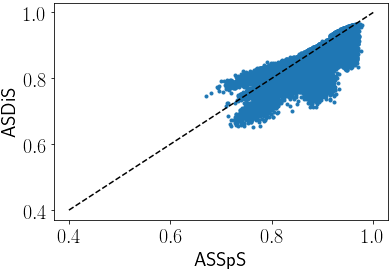

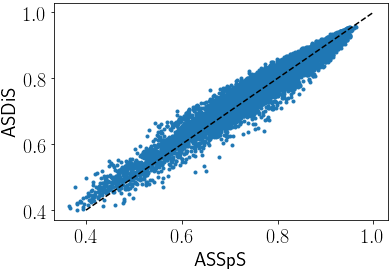

In [82]:
plot(fapSf[:,2]/fapSf[:,0],fapSf[:,5]/fapSf[:,3],'.')
print((fapSf[:,2]/fapSf[:,0]).mean(),(fapSf[:,5]/fapSf[:,3]).mean())
xlabel('ASSpS')
ylabel('ASDiS')
xs = linspace(0.4,1.,10)
plot(xs,xs,'k--')
figure()
plot(fapSf[:,1]/fapSf[:,0],fapSf[:,4]/fapSf[:,3],'.')
xlabel('ASSpS')
ylabel('ASDiS')
xs = linspace(0.4,1.,10)
plot(xs,xs,'k--')

In [196]:
sc = scatter(fdatf[:,1],fdatf[:,3],c= (fap0f[:,2]-fap0f[:,1])/fap0f[:,0],alpha=0.6,cmap='seismic')
colorbar()
xlabel('A_{iDiS}')
ylabel('A_{iSh}')
sc.set_clim(-0.3, 0.3)
plot(linspace(0,0.35),linspace(0,0.35),'k--')

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7fad606109d8> (for post_execute):


RuntimeError: latex was not able to process the following string:
b'A_{iDiS}'

Here is the full report generated by latex:
This is pdfTeX, Version 3.14159265-2.6-1.40.18 (TeX Live 2017/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode

(/users/bssn/serna/.cache/matplotlib/tex.cache/c9ce4188823ecd80f016c9bda8337627
.tex
LaTeX2e <2017-04-15>
Babel <3.18> and hyphenation patterns for 9 language(s) loaded.
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2014/09/29 v1.4h Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texlive/texmf-dist/tex/latex/base/textcomp.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.def))
(/usr/share/texlive/texmf-dist/tex/latex/base/inputenc.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/utf8.def
(/usr/share/texlive/texmf-dist/tex/latex/base/t1enc.dfu)
(/usr/share/texlive/texmf-dist/tex/latex/base/ot1enc.dfu)
(/usr/share/texlive/texmf-dist/tex/latex/base/omsenc.dfu)
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.dfu)))
(/usr/share/texlive/texmf-dist/tex/latex/amsfonts/amssymb.sty
(/usr/share/texlive/texmf-dist/tex/latex/amsfonts/amsfonts.sty))
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifpdf.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifvtex.sty)
(/usr/share/texlive/texmf-dist/tex/generic/ifxetex/ifxetex.sty)

Package geometry Warning: Over-specification in `h'-direction.
    `width' (5058.9pt) is ignored.


Package geometry Warning: Over-specification in `v'-direction.
    `height' (5058.9pt) is ignored.

)
No file c9ce4188823ecd80f016c9bda8337627.aux.
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1cmr.fd)
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
! Missing $ inserted.
<inserted text> 
                $
l.14 \fontsize{20.000000}{25.000000}{\sffamily A_
                                                 {iDiS}}
No pages of output.
Transcript written on c9ce4188823ecd80f016c9bda8337627.log.




RuntimeError: latex was not able to process the following string:
b'A_{iDiS}'

Here is the full report generated by latex:
This is pdfTeX, Version 3.14159265-2.6-1.40.18 (TeX Live 2017/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode

(/users/bssn/serna/.cache/matplotlib/tex.cache/c9ce4188823ecd80f016c9bda8337627
.tex
LaTeX2e <2017-04-15>
Babel <3.18> and hyphenation patterns for 9 language(s) loaded.
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2014/09/29 v1.4h Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texlive/texmf-dist/tex/latex/base/textcomp.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.def))
(/usr/share/texlive/texmf-dist/tex/latex/base/inputenc.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/utf8.def
(/usr/share/texlive/texmf-dist/tex/latex/base/t1enc.dfu)
(/usr/share/texlive/texmf-dist/tex/latex/base/ot1enc.dfu)
(/usr/share/texlive/texmf-dist/tex/latex/base/omsenc.dfu)
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.dfu)))
(/usr/share/texlive/texmf-dist/tex/latex/amsfonts/amssymb.sty
(/usr/share/texlive/texmf-dist/tex/latex/amsfonts/amsfonts.sty))
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifpdf.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifvtex.sty)
(/usr/share/texlive/texmf-dist/tex/generic/ifxetex/ifxetex.sty)

Package geometry Warning: Over-specification in `h'-direction.
    `width' (5058.9pt) is ignored.


Package geometry Warning: Over-specification in `v'-direction.
    `height' (5058.9pt) is ignored.

) (./c9ce4188823ecd80f016c9bda8337627.aux)
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1cmr.fd)
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
! Missing $ inserted.
<inserted text> 
                $
l.14 \fontsize{20.000000}{25.000000}{\sffamily A_
                                                 {iDiS}}
No pages of output.
Transcript written on c9ce4188823ecd80f016c9bda8337627.log.




<Figure size 432x288 with 2 Axes>

In [197]:
#taken from http://chris35wills.github.io/matplotlib_diverging_colorbar/
class MidpointNormalize(matplotlib.colors.Normalize):
    """
    Normalise the colorbar so that diverging bars work there way either side from a prescribed midpoint value)
    e.g. im=ax1.imshow(array, norm=MidpointNormalize(midpoint=0.,vmin=-100, vmax=100))
    """
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        matplotlib.colors.Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y), np.isnan(value))

In [198]:
with open("gatinginfo_f.pickle","rb") as f:
    fapSf,fapDf,fap0f,fapCf,fdatf = pickle.load(f)
x,y,z =fdatf[:,1],fdatf[:,3], (fap0f[:,2]-fap0f[:,1])/fap0f[:,0]
sc = scatter(x,y,c='k',alpha=0.2)
sc = scatter(x,y,c=z,alpha=0.6,cmap='seismic',norm = MidpointNormalize(midpoint = 0., vmin = -0.3, vmax = 0.5))
colorbar()
xlabel('A_{iDiS}')
ylabel('A_{iSh}')
#plot(linspace(0,0.35),0.85*linspace(0,0.35)+0.,'k--')
#plot(linspace(0,0.35),1*linspace(0,0.35)+0.1,'k--')
plot(linspace(0,0.35),1.4*linspace(0,0.35)+0.18,'k--')

triang = matplotlib.tri.Triangulation(x, y)
TR = tricontour(x, y, z, arange(-0.3,0.6,0.1), linewidths=0.5, colors='k')
#clabel(TR, inline=1, fontsize=10)
#tricontourf(x, y, z, arange(-0.3,0.6,0.1))

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7fad606109d8> (for post_execute):


RuntimeError: latex was not able to process the following string:
b'A_{iDiS}'

Here is the full report generated by latex:
This is pdfTeX, Version 3.14159265-2.6-1.40.18 (TeX Live 2017/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode

(/users/bssn/serna/.cache/matplotlib/tex.cache/c9ce4188823ecd80f016c9bda8337627
.tex
LaTeX2e <2017-04-15>
Babel <3.18> and hyphenation patterns for 9 language(s) loaded.
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2014/09/29 v1.4h Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texlive/texmf-dist/tex/latex/base/textcomp.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.def))
(/usr/share/texlive/texmf-dist/tex/latex/base/inputenc.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/utf8.def
(/usr/share/texlive/texmf-dist/tex/latex/base/t1enc.dfu)
(/usr/share/texlive/texmf-dist/tex/latex/base/ot1enc.dfu)
(/usr/share/texlive/texmf-dist/tex/latex/base/omsenc.dfu)
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.dfu)))
(/usr/share/texlive/texmf-dist/tex/latex/amsfonts/amssymb.sty
(/usr/share/texlive/texmf-dist/tex/latex/amsfonts/amsfonts.sty))
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifpdf.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifvtex.sty)
(/usr/share/texlive/texmf-dist/tex/generic/ifxetex/ifxetex.sty)

Package geometry Warning: Over-specification in `h'-direction.
    `width' (5058.9pt) is ignored.


Package geometry Warning: Over-specification in `v'-direction.
    `height' (5058.9pt) is ignored.

) (./c9ce4188823ecd80f016c9bda8337627.aux)
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1cmr.fd)
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
! Missing $ inserted.
<inserted text> 
                $
l.14 \fontsize{20.000000}{25.000000}{\sffamily A_
                                                 {iDiS}}
No pages of output.
Transcript written on c9ce4188823ecd80f016c9bda8337627.log.




RuntimeError: latex was not able to process the following string:
b'A_{iDiS}'

Here is the full report generated by latex:
This is pdfTeX, Version 3.14159265-2.6-1.40.18 (TeX Live 2017/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode

(/users/bssn/serna/.cache/matplotlib/tex.cache/c9ce4188823ecd80f016c9bda8337627
.tex
LaTeX2e <2017-04-15>
Babel <3.18> and hyphenation patterns for 9 language(s) loaded.
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2014/09/29 v1.4h Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texlive/texmf-dist/tex/latex/base/textcomp.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.def))
(/usr/share/texlive/texmf-dist/tex/latex/base/inputenc.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/utf8.def
(/usr/share/texlive/texmf-dist/tex/latex/base/t1enc.dfu)
(/usr/share/texlive/texmf-dist/tex/latex/base/ot1enc.dfu)
(/usr/share/texlive/texmf-dist/tex/latex/base/omsenc.dfu)
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.dfu)))
(/usr/share/texlive/texmf-dist/tex/latex/amsfonts/amssymb.sty
(/usr/share/texlive/texmf-dist/tex/latex/amsfonts/amsfonts.sty))
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifpdf.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifvtex.sty)
(/usr/share/texlive/texmf-dist/tex/generic/ifxetex/ifxetex.sty)

Package geometry Warning: Over-specification in `h'-direction.
    `width' (5058.9pt) is ignored.


Package geometry Warning: Over-specification in `v'-direction.
    `height' (5058.9pt) is ignored.

) (./c9ce4188823ecd80f016c9bda8337627.aux)
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1cmr.fd)
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
! Missing $ inserted.
<inserted text> 
                $
l.14 \fontsize{20.000000}{25.000000}{\sffamily A_
                                                 {iDiS}}
No pages of output.
Transcript written on c9ce4188823ecd80f016c9bda8337627.log.




<Figure size 432x288 with 2 Axes>

Interpretation: When they have the same area, inhibition in shaft does slightly more effect ~0.003? than when it is in DiS. To have the same effect, A_{ish} should be 15% smaller (0.85 A_{ish}???!)? To have 0.1 more effect, A_{ish} has to be 0.1 um^2 larger than A_{iDiS}. And to have 0.2 more effect A_{ish} = 1.4 A_{iDiS} + 0.18

In [199]:
with open("gatinginfo_f_cm1.pickle","rb") as f:
    fapSf,fapDf,fap0f,fapCf,fdatf = pickle.load(f)
x,y,z =fdatf[:,1],fdatf[:,3], (fap0f[:,2]-fap0f[:,1])/fap0f[:,0]
sc = scatter(x,y,c='k',alpha=0.2)
sc = scatter(x,y,c=z,alpha=0.6,cmap='seismic',norm = MidpointNormalize(midpoint = 0., vmin = -0.3, vmax = 0.5))
colorbar()
xlabel('A_{iDiS}')
ylabel('A_{iSh}')
plot(linspace(0,0.35),0.85*linspace(0,0.35)+0.,'k--')
plot(linspace(0,0.35),1*linspace(0,0.35)+0.1,'k--')
plot(linspace(0,0.35),1.4*linspace(0,0.35)+0.18,'k--')

triang = matplotlib.tri.Triangulation(x, y)
TR = tricontour(x, y, z, arange(-0.3,0.6,0.1), linewidths=0.5, colors='k')
#clabel(TR, inline=1, fontsize=10)
#tricontourf(x, y, z, arange(-0.3,0.6,0.1))

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7fad606109d8> (for post_execute):


RuntimeError: latex was not able to process the following string:
b'A_{iDiS}'

Here is the full report generated by latex:
This is pdfTeX, Version 3.14159265-2.6-1.40.18 (TeX Live 2017/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode

(/users/bssn/serna/.cache/matplotlib/tex.cache/c9ce4188823ecd80f016c9bda8337627
.tex
LaTeX2e <2017-04-15>
Babel <3.18> and hyphenation patterns for 9 language(s) loaded.
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2014/09/29 v1.4h Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texlive/texmf-dist/tex/latex/base/textcomp.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.def))
(/usr/share/texlive/texmf-dist/tex/latex/base/inputenc.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/utf8.def
(/usr/share/texlive/texmf-dist/tex/latex/base/t1enc.dfu)
(/usr/share/texlive/texmf-dist/tex/latex/base/ot1enc.dfu)
(/usr/share/texlive/texmf-dist/tex/latex/base/omsenc.dfu)
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.dfu)))
(/usr/share/texlive/texmf-dist/tex/latex/amsfonts/amssymb.sty
(/usr/share/texlive/texmf-dist/tex/latex/amsfonts/amsfonts.sty))
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifpdf.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifvtex.sty)
(/usr/share/texlive/texmf-dist/tex/generic/ifxetex/ifxetex.sty)

Package geometry Warning: Over-specification in `h'-direction.
    `width' (5058.9pt) is ignored.


Package geometry Warning: Over-specification in `v'-direction.
    `height' (5058.9pt) is ignored.

) (./c9ce4188823ecd80f016c9bda8337627.aux)
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1cmr.fd)
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
! Missing $ inserted.
<inserted text> 
                $
l.14 \fontsize{20.000000}{25.000000}{\sffamily A_
                                                 {iDiS}}
No pages of output.
Transcript written on c9ce4188823ecd80f016c9bda8337627.log.




RuntimeError: latex was not able to process the following string:
b'A_{iDiS}'

Here is the full report generated by latex:
This is pdfTeX, Version 3.14159265-2.6-1.40.18 (TeX Live 2017/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode

(/users/bssn/serna/.cache/matplotlib/tex.cache/c9ce4188823ecd80f016c9bda8337627
.tex
LaTeX2e <2017-04-15>
Babel <3.18> and hyphenation patterns for 9 language(s) loaded.
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2014/09/29 v1.4h Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texlive/texmf-dist/tex/latex/base/textcomp.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.def))
(/usr/share/texlive/texmf-dist/tex/latex/base/inputenc.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/utf8.def
(/usr/share/texlive/texmf-dist/tex/latex/base/t1enc.dfu)
(/usr/share/texlive/texmf-dist/tex/latex/base/ot1enc.dfu)
(/usr/share/texlive/texmf-dist/tex/latex/base/omsenc.dfu)
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.dfu)))
(/usr/share/texlive/texmf-dist/tex/latex/amsfonts/amssymb.sty
(/usr/share/texlive/texmf-dist/tex/latex/amsfonts/amsfonts.sty))
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifpdf.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifvtex.sty)
(/usr/share/texlive/texmf-dist/tex/generic/ifxetex/ifxetex.sty)

Package geometry Warning: Over-specification in `h'-direction.
    `width' (5058.9pt) is ignored.


Package geometry Warning: Over-specification in `v'-direction.
    `height' (5058.9pt) is ignored.

) (./c9ce4188823ecd80f016c9bda8337627.aux)
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1cmr.fd)
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
! Missing $ inserted.
<inserted text> 
                $
l.14 \fontsize{20.000000}{25.000000}{\sffamily A_
                                                 {iDiS}}
No pages of output.
Transcript written on c9ce4188823ecd80f016c9bda8337627.log.




<Figure size 432x288 with 2 Axes>